Імпортуємо залежності. З цікавого - датасет mnist, у якому є нормально так всяких рукописних циферок (digits)

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Деструктуруємо датасети тренерування та тестування та виводимо їх, щоб прощупати

11490434/11490434 [==============================] - 1s 0us/step


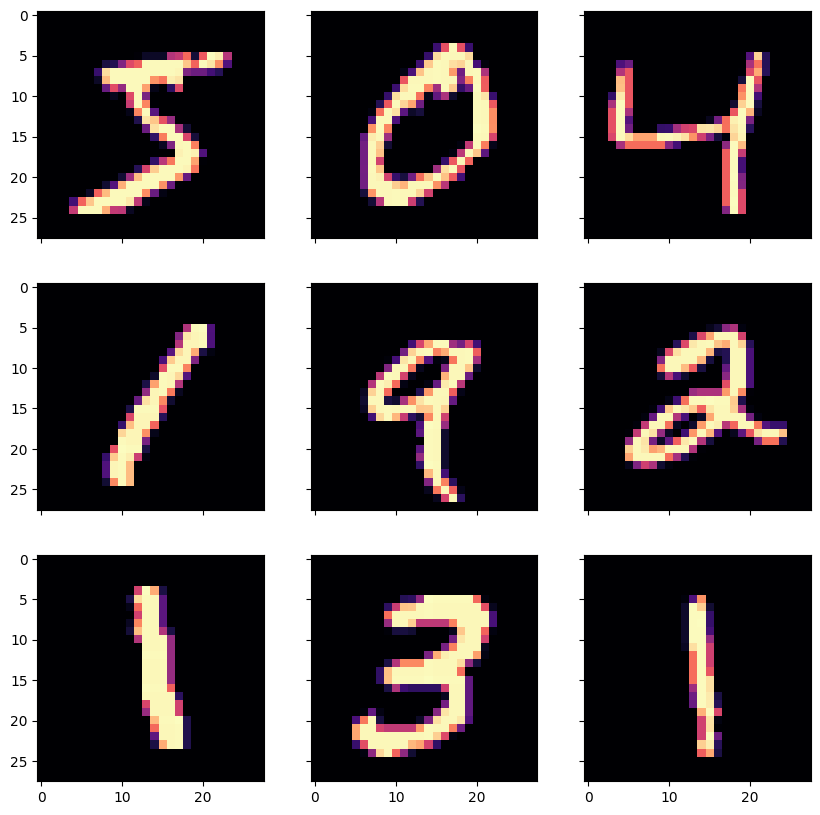

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("magma"))
plt.show()

In [3]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

-1.2742625 -0.039819695 17.46127


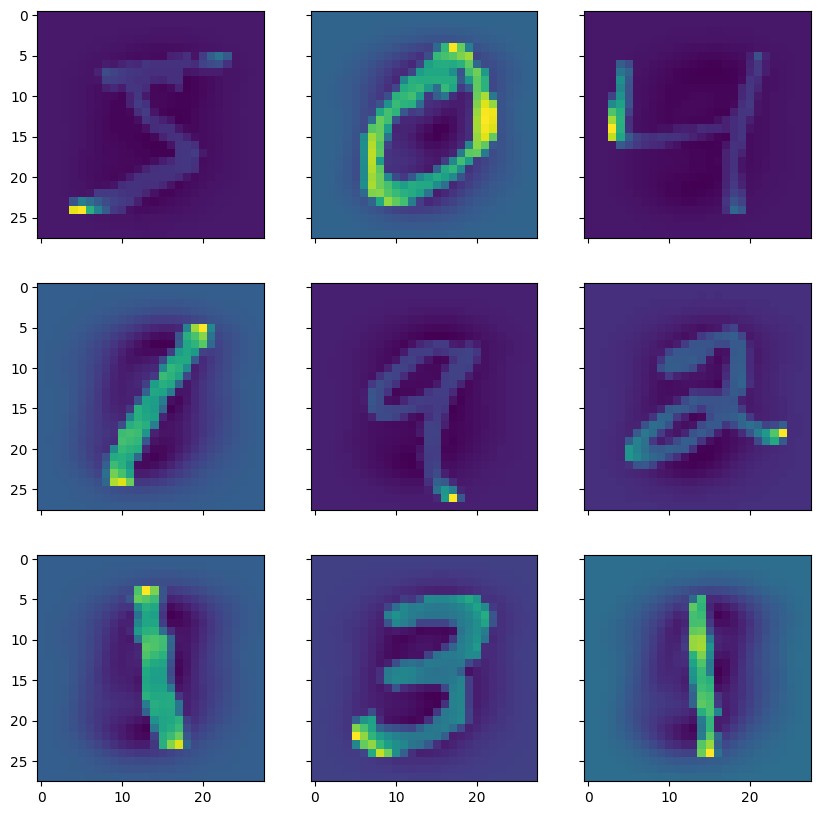

In [4]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
data_generator.mean = X_train.mean(axis=0)
data_generator.std = X_train.std(axis=0)

for X_batch, y_batch in data_generator.flow(X_train, y_train, batch_size=12, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("viridis"))
    plt.show()
    break